# **Program 4**

Prepare a linear regression model for predicting the salary of user based on number of years of experience.

Model coefficient(s): [9202.23359825]
Model intercept: 26049.577715443353
Model R^2 score on test set: 0.9248580247217075


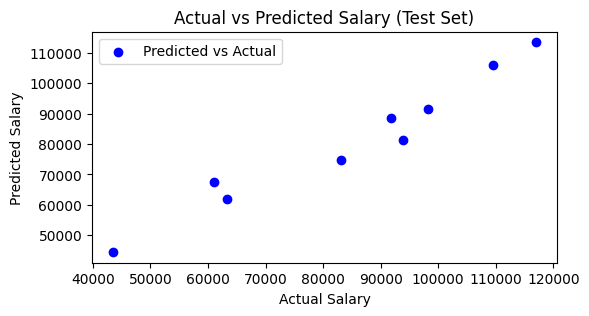

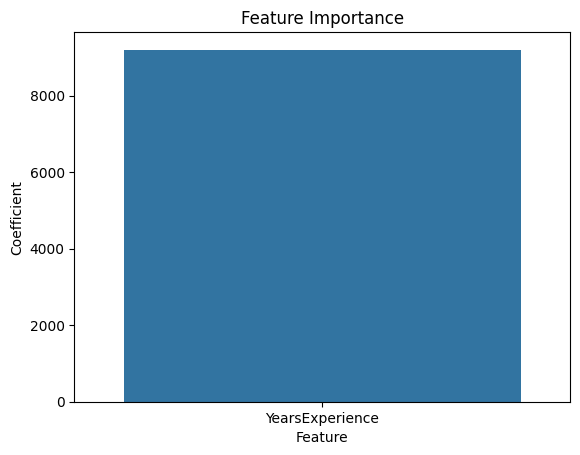

In [20]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
df = pd.read_csv('Salary_Data.csv')

# defining the feature variable 'x' by dropping Salary and target variable 'y' as the Salary column
x = df.drop('Salary', axis=1)
y = df['Salary']

# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# initialize and train the Linear Regression model on the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Predict the target variable for the test set
y_test_predict = model.predict(x_test)

# Display the model's coefficient and intercept
print("Model coefficient(s):", model.coef_)
print("Model intercept:", model.intercept_)
print("Model R^2 score on test set:", model.score(x_test, y_test))

# scatter plot to visualize the relationship between predicted and actual values in the test set
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_test_predict, color='blue', label="Predicted vs Actual")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Test Set)")
plt.legend()
plt.show()

# bar plot to display the importance of each feature based on model coefficients
imp=pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))),columns=['Feature','Coefficient'])
sns.barplot(x='Feature', y='Coefficient', data=imp)
plt.title("Feature Importance")
plt.show()